In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Colour Image shape: 1440, 1920, 3

Size 400 905
Count 44581.0


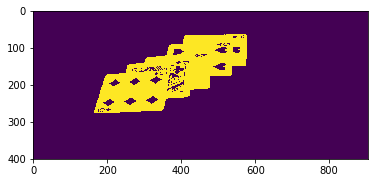

In [2]:
img = cv2.imread("Original Files/GOPR0318/01305.png", cv2.IMREAD_GRAYSCALE) #IMREAD_COLOR IMREAD_GRAYSCALE 
white = img[400:800,320:1225] #only extract the middle of the image - i.e. the desk
white[white >= 150] = 255
white[white < 200]  = 0
height,width = white.shape
print('Size',height,width)
print('Count',white.sum()/255)
plt.imshow(white);

In [3]:
#filter
filt = np.array([[1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1]])

def check_density(img,x,y,height,width):
    dot_prod = 0
    if(x+3<height and y+3< width and x-3>=0 and y-3>=0):
#         print(np.array(white[x-2:x+3,y-2:y+3]))
        dot_prod = np.sum(np.dot(np.array(img[x-3:x+4,y-3:y+4]),filt))
        
    if(dot_prod > (255*7*7)):
        return False
    else:
        return True

In [16]:

topNotFound = True
top =- 1

while(topNotFound):
    top+=1
    for j in range(width):
        if (white[top,j] == 255):
            topNotFound = check_density(top,j,height,width)

botNotFound = True
bot = height
while(botNotFound):
    bot-=1
    for j in range(width):
        if (white[bot,j] == 255):
            botNotFound = check_density(bot,j,height,width)

lefNotFound = True
lef = -1
while(lefNotFound):
    lef+=1
    for j in range(height):
        if (white[j,lef] == 255):
            lefNotFound = check_density(j,lef,height,width)

rigNotFound = True
rig = width
while(rigNotFound):
    rig-=1
    for j in range(height):
        if (white[j,rig] == 255):
            rigNotFound = check_density(j,rig,height,width)


top_crop = white[top:bot,lef:rig]
plt.imshow(top_crop)

TypeError: check_density() missing 1 required positional argument: 'width'

In [4]:
def getCardBox(img_file, removeImg = 0, old_box = None):
    
    img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE) #IMREAD_COLOR IMREAD_GRAYSCALE 
    img = img[400:800,320:1225] #only extract the middle of the image - i.e. the desk
    
    img[img >= 150] = 255
    img[img < 200]  = 0
    img_full = img.copy()
    if(removeImg != 0):
        img[old_box[1]:old_box[2],old_box[3]:old_box[4]] = 0
        
    height,width = img.shape
    
    topNotFound = True
    top = -1
    top_full = -1
    while(topNotFound):
        top+=1
        for j in range(width):
            if (img[top,j] == 255):
                topNotFound = check_density(img,top,j,height,width)
                if(not topNotFound):
                    break
            if (top_full == -1 and img_full[top,j] == 255):
                if(not check_density(img_full,top,j,height,width)):
                    top_full = top
                

    botNotFound = True
    bot = height
    while(botNotFound):
        bot-=1
        for j in range(width):
            if (img[bot,j] == 255):
                botNotFound = check_density(img,bot,j,height,width)
                if(not botNotFound):
                    break

    lefNotFound = True
    lef = -1
    while(lefNotFound):
        lef+=1
        for j in range(height):
            if (img[j,lef] == 255):
                lefNotFound = check_density(img,j,lef,height,width)
                if(not lefNotFound):
                    break

    rigNotFound = True
    rig = width
    rig_full = -1
    while(rigNotFound):
        rig-=1
        for j in range(height):
            if (img[j,rig] == 255):
                rigNotFound = check_density(img,j,rig,height,width)
                if(not topNotFound):
                    break
            if (rig_full == -1 and img_full[j,rig] == 255):
                if(not check_density(img_full,j,rig,height,width)):
                    rig_full = rig

    if(removeImg == 0):
        return([img,top,bot,lef,rig])
    else:
        return([img_full,img,top,bot,lef,rig,top_full,rig_full])


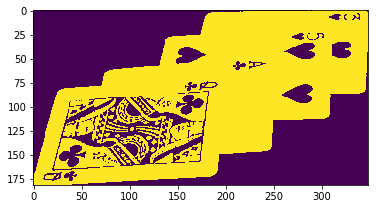

In [10]:
old_box = getCardBox("Original Files/GOPR0318/01049.png")
plt.imshow(old_box[0][old_box[1]:old_box[2],old_box[3]:old_box[4]])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 169, 276, 165, 356, 63, 577]


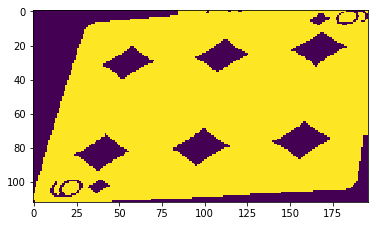

In [15]:
new_box = getCardBox("Original Files/GOPR0318/01305.png",1,old_box)
print(new_box)
plt.imshow(new_box[0][new_box[2]-5:new_box[3],new_box[4]:new_box[5]+5])

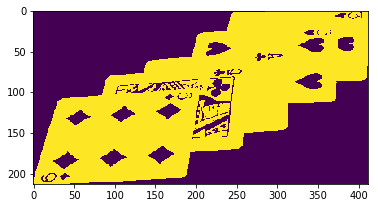

In [11]:
plt.imshow(new_box[0][new_box[6]:new_box[3],new_box[4]:new_box[7]])

steps for layered cards:
- read card
- request new card
- read new 2 card combo
- remove old card info